# Machine Learning Pipeline

In [1]:
# importo le librerie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from scipy.stats import poisson, randint

In [2]:
# carico il dataset dividendo tra features e labels
features, target = datasets.load_wine(return_X_y = True, as_frame = True)

In [3]:
# stampo matrice delle features
display(features)
# stampo vettore target
display(target)

# mostro quante sono le possibili labels
pd.unique(target)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

array([0, 1, 2])

In [4]:
# divido in training set e test set, utilizzando il 30% dei dati per il test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30)

In [5]:
# Creo il modello
tree = DecisionTreeClassifier()

# creo distribuzione dell'iperparametro
depth_distribution = {'max_depth': poisson(mu = 10), 'max_leaf_nodes': randint(low = 5, high = 35)}

# valido l'iperparametro
clf = RandomizedSearchCV(estimator = tree, n_iter = 10, param_distributions = depth_distribution, n_jobs = -1, scoring = 'accuracy', cv = 5)

# addestro il modello
clf.fit(X_train, y_train)

# i migliori valori dei parametri
print(f'i migliori valori dei parametri sono: {clf.best_params_}')

# valuto la accuratezza media della migliore combinazione di parametri
tree_score = clf.best_score_
print(f"l'accuratezza media del miglior modello è {tree_score}")
                                                  
# valuto l'accuratezza sul test set
tree_test_score = accuracy_score(y_test, clf.predict(X_test))
print(f"l'accuratezza sul test set è {tree_test_score}")

i migliori valori dei parametri sono: {'max_depth': 11, 'max_leaf_nodes': 23}
l'accuratezza media del miglior modello è 0.968
l'accuratezza sul test set è 0.9444444444444444


In [6]:
# controllo che la precisione non sia dovuta a una classe prevalente
target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

Il modello Decision Tree fornisce già degli ottimi risultati sul test set (precisione del 92%). Tuttavia, passando ad un modello Random Forest, si potrebbe ulteriormente ridurre la varianza eccessiva del modello e quindi un leggero overfitting.

In [7]:
# creo il modello
random_forest = RandomForestClassifier()

# creo un dizionario coi possibili valori dei parametri
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 13)}

# valido i parametri 
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10)
clf.fit(X_train, y_train)

# controllo i migliori valori dei iperparametri e la loro accuratezza
print(f""" I migliori valori degli iperparametri sono: {clf.best_params_} 
 La loro accuratezza media sul training set è {clf.best_score_}""")

 I migliori valori degli iperparametri sono: {'max_features': 6, 'n_estimators': 98} 
 La loro accuratezza media sul training set è 0.9756666666666666


In [8]:
# calcolo l'accuratezza del modello
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9814814814814815


Come si può notare l'accuratezza del modello è aumentata ulteriormente. Si potrebbe anche valutare di eliminare alcune features e verificare il cambiamento nella precisione del modello.

[ 83.06886407  29.39931923   7.6209817   20.37025572   7.15403066
  93.20177442 262.53009741  26.40115678  29.44141346  78.48046983
  71.61763065 151.14146917 115.1649352 ]
7


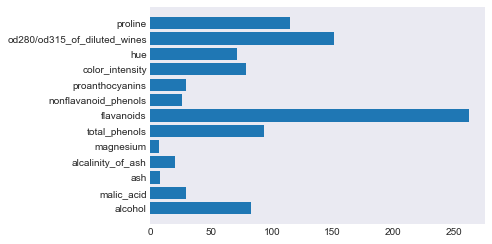

In [9]:
# guardo i punteggi delle features usando SelectKbest
selector = SelectKBest(k = 'all')

# applico il selezionatore solo al training set, e stampo i punteggi delle feature
selector.fit(X_train, y_train)
print(selector.scores_)

# seleziono solo le features con uno score superiore a 50
print(len([score for score in selector.scores_ if score > 50 ]))

# imposto stile del grafico
plt.style.use('seaborn-dark')

# creo barplot
plt.barh(y = X_train.columns, width = selector.scores_)

plt.show()

In [10]:
# creo un selezionatore delle migliori 7 features
selector = SelectKBest(k = 7)

# trasformo la matrice delle features originale
X_train_new = selector.fit_transform(X_train, y_train)
print(X_train_new.shape)

(124, 7)


In [11]:
# creo un nuovo modello da addestrare sulla nuova matrice delle features
random_forest = RandomForestClassifier()

# creo un dizionario coi possibili valori dei parametri
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 7)}

# valido i parametri 
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10)

# addestro il modello sulla nuova matrice delle features
clf.fit(X_train_new, y_train)

# controllo i migliori valori dei parametri
print(f'''I migliori valori dei parametri sono {clf.best_params_} 
La loro accuratezza media è {clf.best_score_}''')


I migliori valori dei parametri sono {'max_features': 3, 'n_estimators': 102} 
La loro accuratezza media è 0.9756666666666666


In [12]:
# applico la selezione anche al test set
X_test_new = selector.fit_transform(X_test, y_test)

# ricalcolo l'accuratezza del modello
clf.score(X_test_new, y_test)

0.9814814814814815

Ricalcolando l'accuratezza risulta evidente che quasi tutta l'informazione necessaria al modello per la prediction è prodotta dalle migliori 7 features: nonostante siano state eliminate 5 features, la perdita della precisione è solamente dell' 1%!

In [13]:
wine = datasets.load_wine()
original_features = np.array(wine.feature_names)
features_filter = selector.get_support()

print('Le migliori 7 features sono: ')
print([feature for feature in original_features[features_filter]])

Le migliori 7 features sono: 
['alcohol', 'alcalinity_of_ash', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
